In [1]:
from pathlib import Path
import sys

parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))

In [2]:
from utils.pred_plot import plot_volume_forecast



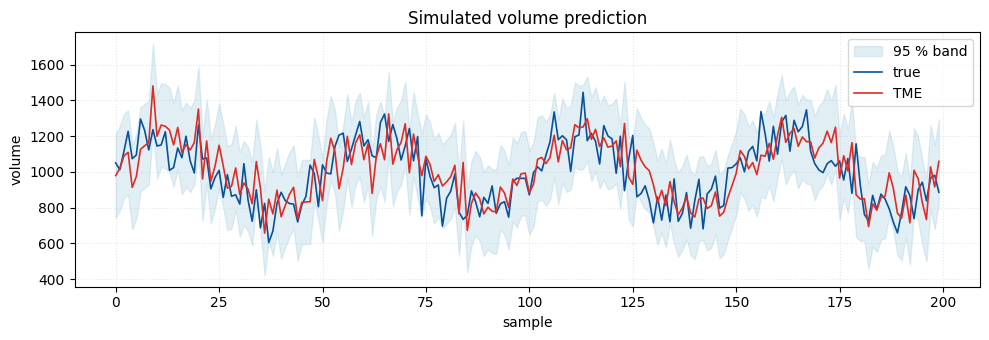

In [5]:
import numpy as np

# Simulate true volume: noisy sinusoidal baseline
np.random.seed(42)
n = 200
t = np.linspace(0, 8*np.pi, n)
y_true = 1000 + 200 * np.sin(t) + 100 * np.random.randn(n)

# Simulate predicted volume (slightly lagged + bias)
y_pred = 1000 + 180 * np.sin(t - 0.3) + 90 * np.random.randn(n)

# Simulate a confidence band around the prediction
noise_std = 120
sigma = np.full_like(y_pred, noise_std)
lower = y_pred - 1.96 * sigma
upper = y_pred + 1.96 * sigma

# Simulate baseline (mean-only model)
baseline = np.full_like(y_true, np.mean(y_true))

# Simulate oracle (cleaner sinusoid, no noise)
oracle = 1000 + 200 * np.sin(t)

# Plot using the function
plot_volume_forecast(
    y_true=y_true,
    y_pred=y_pred,
    lower=lower,
    upper=upper,
    #extra1=baseline,
    #extra2=oracle,
    labels=("true", "TME"), # , "baseline", "oracle"
    title="Simulated volume prediction"
)


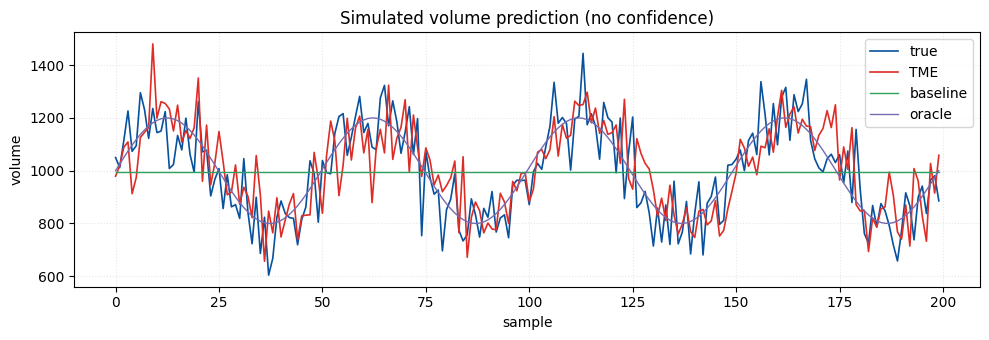

In [4]:
import numpy as np

# Simulate true volume: noisy sine pattern
np.random.seed(42)
n = 200
t = np.linspace(0, 8*np.pi, n)
y_true = 1000 + 200 * np.sin(t) + 100 * np.random.randn(n)

# Simulate predicted volume (imperfect fit)
y_pred = 1000 + 180 * np.sin(t - 0.3) + 90 * np.random.randn(n)

# Simulate a baseline (flat model)
baseline = np.full_like(y_true, np.mean(y_true))

# Simulate an oracle model (perfect sine, no noise)
oracle = 1000 + 200 * np.sin(t)

# Plot using the helper
plot_volume_forecast(
    y_true=y_true,
    y_pred=y_pred,
    extra1=baseline,
    extra2=oracle,
    labels=("true", "TME", "baseline", "oracle"),
    title="Simulated volume prediction (no confidence)"
)
